<a href="https://colab.research.google.com/github/RodrigoEduard/TFMviu/blob/main/RTraMineR_Norte_Grande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
library(readxl)
conduccion_v1 <- read_excel("conduccion_220723_sinVacios.xlsx")

In [5]:
conduccion_v1$`MES INGRESO` <- as.numeric(conduccion_v1$`MES INGRESO`)
# Crear una nueva columna 'FECHA' combinando 'AÑO INGRESO' y 'MES INGRESO' en el formato "YYYY-MM"
conduccion_v1$FECHA <- paste('a', substr(conduccion_v1$`AÑO INGRESO`, 3, 4), '.', sprintf("%02d", conduccion_v1$`MES INGRESO`), sep = "")

In [6]:
#ZONA: NORTE GRANDE ----
regiones <- c('DE ARICA Y PARINACOTA', 'DE TARAPACA', 'DE ANTOFAGASTA')
dat <- subset(conduccion_v1, `NOMBRE REGION` %in% regiones)
dat = table(dat$`NOMBRE COMUNA`,dat$`FECHA`)
pde_f = 100*(dat/rowSums(dat))
pde_f = as.data.frame(pde_f)
max = max(pde_f[,3],na.rm=T)
max = round(max,digits = 0)
mediana = median(pde_f[,3],na.rm=T)  #calcula la mediana de la tercera columna del dataframe pde_f, ignorando cualquier valor NA, y luego asigna ese valor a la variable mediana.
pde_f$clase = 0
pde_f$clase[pde_f$Freq == mediana] <- 'IGUAL'
pde_f$clase[pde_f$Freq > mediana] <- 'SOBRE'
pde_f$clase[pde_f$Freq < mediana] <- 'BAJO'
pde_f$clase[pde_f$Freq == 0] <- 'SIN_REG'

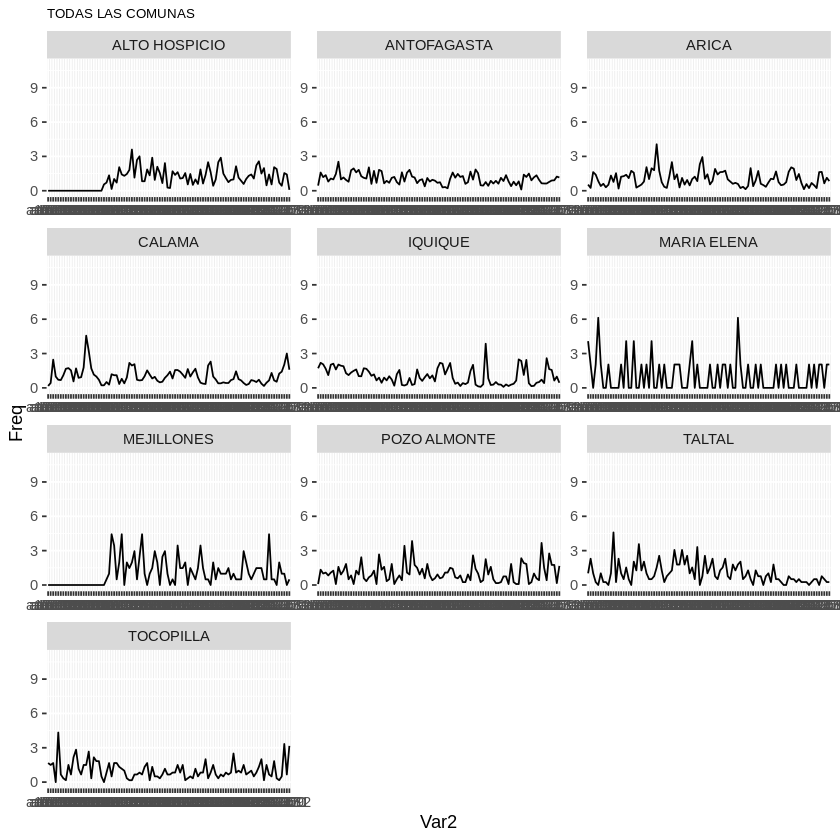

In [7]:
# Plot
library(ggplot2)
library(magrittr)
pde_f %>%
  ggplot( aes(x=Var2, y=Freq, group=Var1)) +
  geom_line()+facet_wrap(vars(Var1), ncol = 3,scales = "free")+theme(legend.position = "none") + ylim(0, max+5) +
  ggtitle("TODAS LAS COMUNAS") + theme(plot.title = element_text(size = 8))

In [8]:
library(tidyverse)
TRAN <- pde_f %>%
  rename(id = Var1) %>%
  group_by(id, Var2) %>%
  summarise(clase = first(clase), .groups = "drop") %>%
  pivot_wider(names_from = Var2, values_from = clase)

TRAN <- as.data.frame(TRAN)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
install.packages("TraMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘vegan’




In [12]:
# DATA >*************************Data***********************************************
library(TraMineR)
seqstatl(TRAN[, 2:97])

TRAN.alphabet <- c("IGUAL", "SOBRE", "BAJO", "SIN_REG")
TRAN.labels <- c("IGUAL", "SOBRE", "BAJO", "SIN_REG")
TRAN.scodes <- c("IG", "SO", "BA", "SR")
TRAN.seq <- seqdef(TRAN, 2:97, alphabet = TRAN.alphabet, states = TRAN.scodes,
                   labels = TRAN.labels, xtstep = 4)


TraMineR stable version 2.2-7 (Built: 2023-07-27)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.




[1] "BAJO"    "SIN_REG" "SOBRE"

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  IGUAL       IG       IGUAL

     2  SOBRE       SO       SOBRE

     3  BAJO        BA       BAJO

     4  SIN_REG     SR       SIN_REG

 [>] 10 sequences in the data set

 [>] min/max sequence length: 96/96



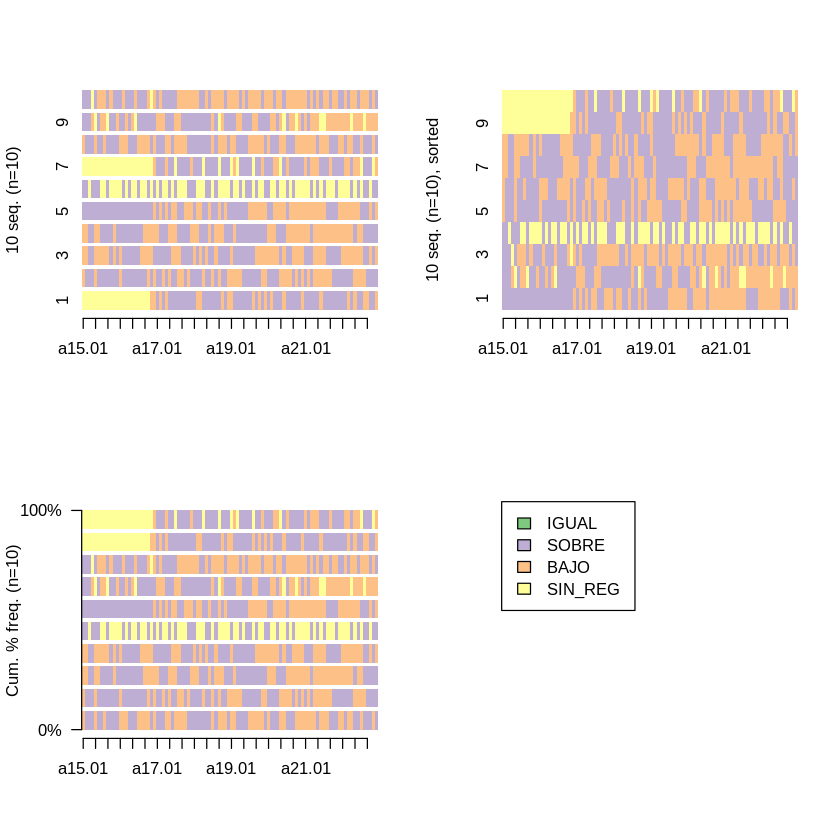

In [13]:
# Visualización de conjuntos de datos **********Visualize********************************
par(mfrow = c(2, 2))
seqiplot(TRAN.seq, with.legend = FALSE, border = NA)
seqIplot(TRAN.seq, sortv = "from.start", with.legend = FALSE)
seqfplot(TRAN.seq, with.legend = FALSE, border = NA)
seqlegend(TRAN.seq)

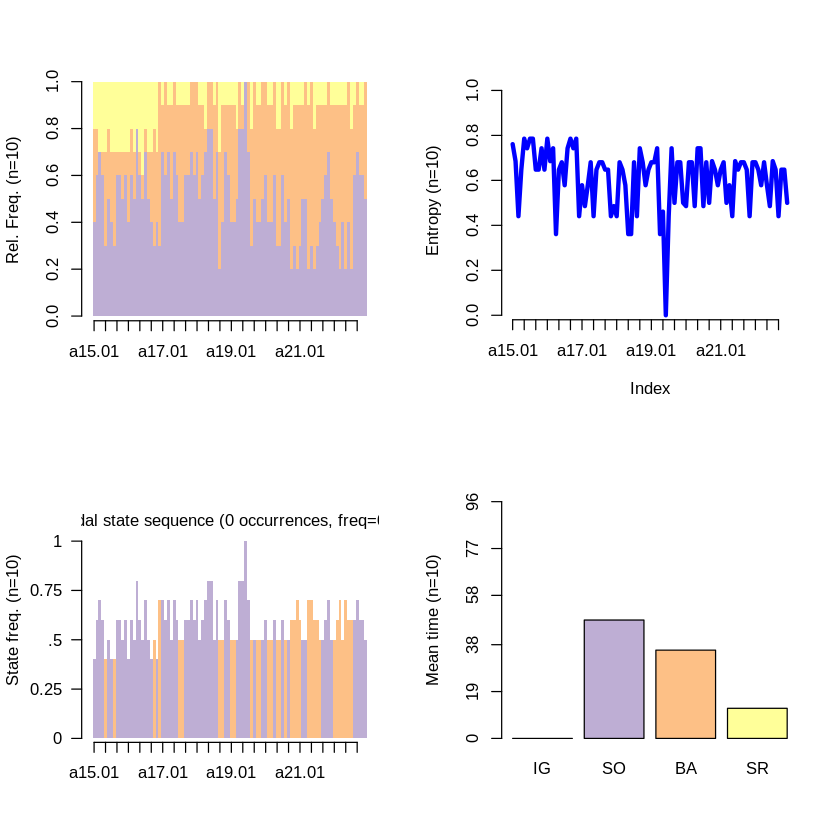

In [14]:
# Cálculo y visualización de estadísticas descriptivas *******Describe******************
par(mfrow = c(2, 2))
seqdplot(TRAN.seq, with.legend = FALSE, border = NA)
seqHtplot(TRAN.seq)
seqmsplot(TRAN.seq, with.legend = FALSE, border = NA)
seqmtplot(TRAN.seq, with.legend = FALSE)

 [>] 10 sequences with 4 distinct states

 [>] Computing sm with seqcost using  TRATE

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states IG/SO/BA/SR ...

 [>] 10 distinct  sequences 

 [>] min/max sequence lengths: 96/96

 [>] computing distances using the OM metric

 [>] elapsed time: 0.108 secs



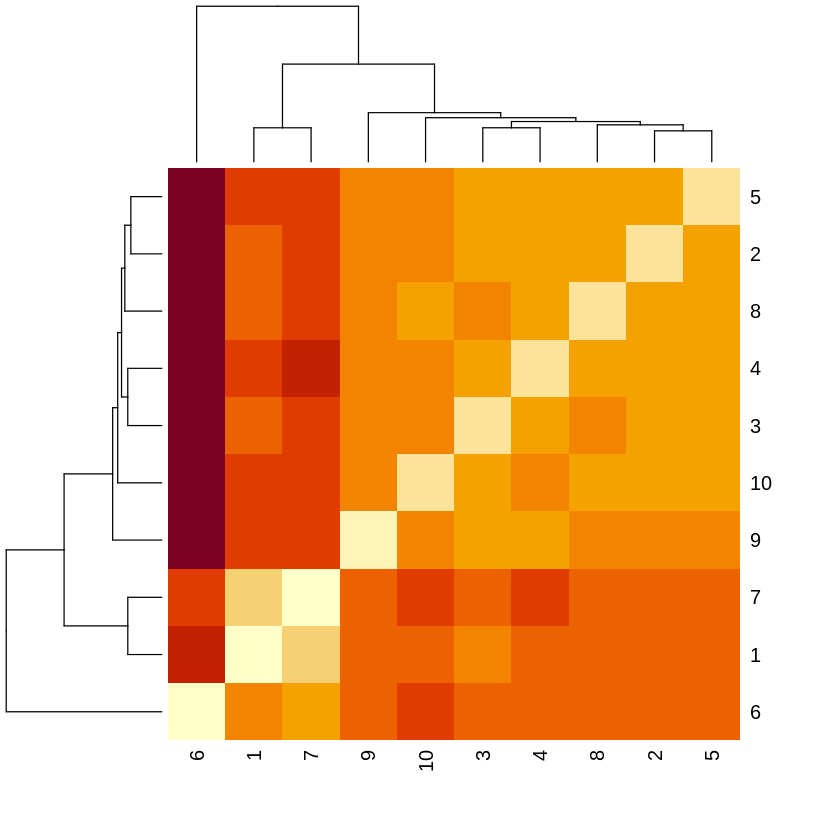

In [15]:
# Typology**************************************************************Typology********
dist.om1 <- seqdist(TRAN.seq, method = "OM", indel = 1, sm = "TRATE")
heatmap(dist.om1)

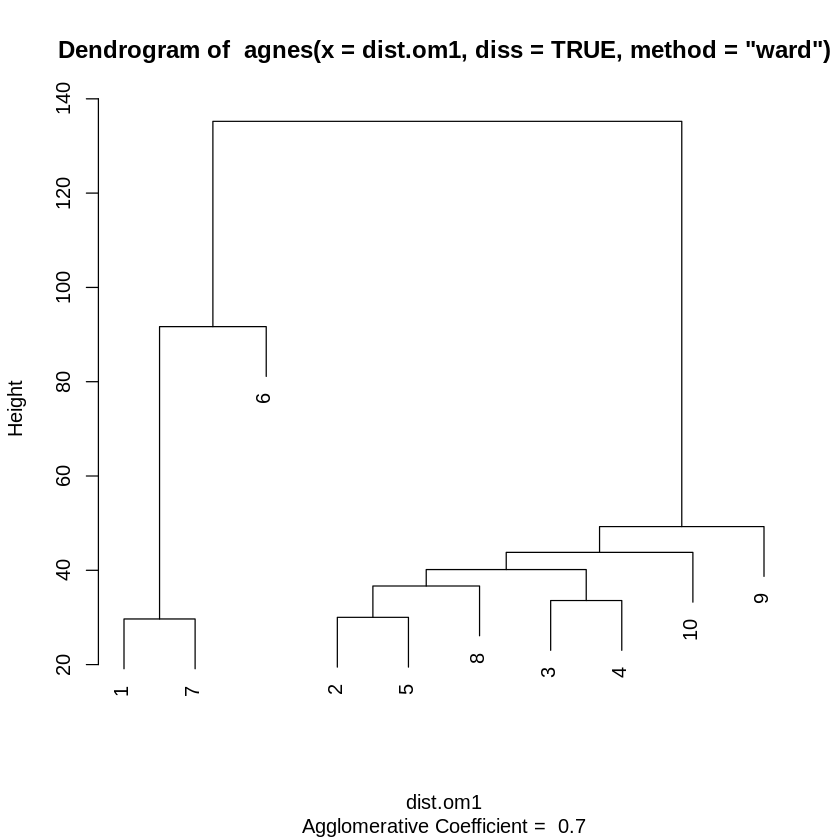

In [16]:
library(cluster)
clusterward1 <- agnes(dist.om1, diss = TRUE, method = "ward")
plot(clusterward1, which.plot = 2)

cl1.4 <- cutree(clusterward1, k = 3)
cl1.4fac <- factor(cl1.4, labels = paste("Type", 1:3))

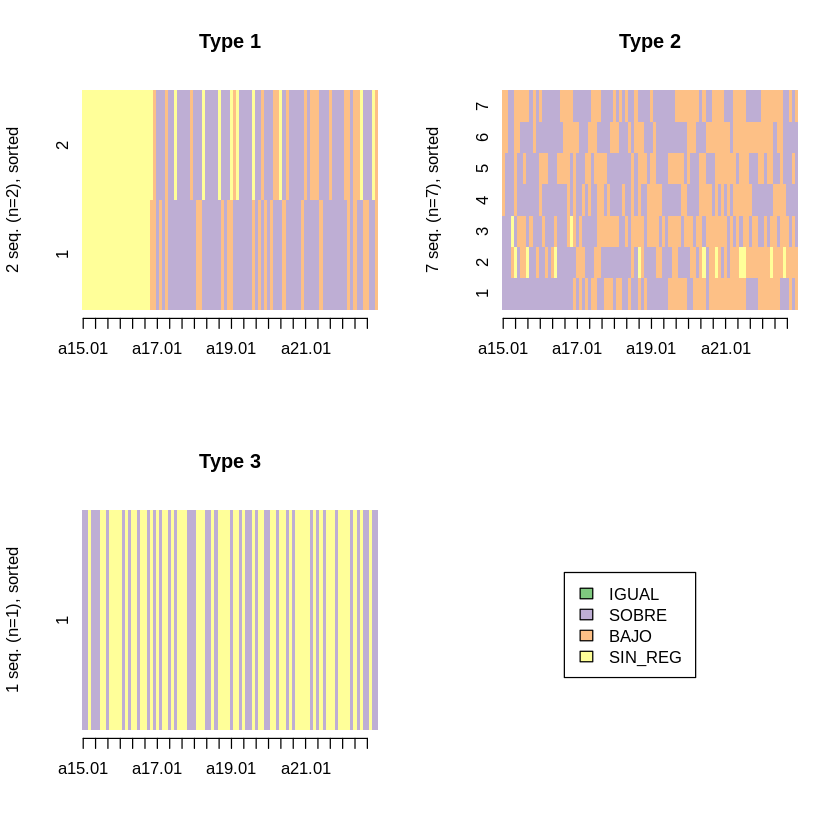

In [17]:
seqIplot(TRAN.seq, group = cl1.4fac, sortv = "from.start")

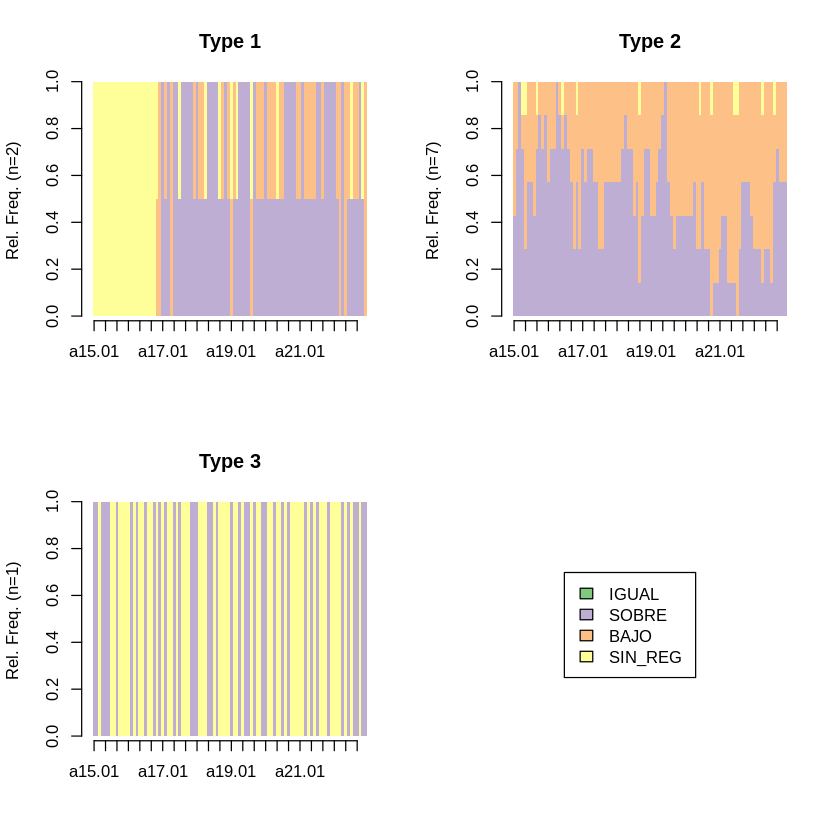

In [18]:
seqdplot(TRAN.seq, group = cl1.4fac, border = NA)

In [ ]:
seqrplot(TRAN.seq, diss = dist.om1, group = cl1.4fac, border = NA)

In [ ]:
#Secuencias de eventos *****************************************Events****************
TRAN.seqe <- seqecreate(TRAN.seq, use.labels = FALSE)

fsubseq <- seqefsub(TRAN.seqe, pmin.support = 0.001)
plot(fsubseq[1:3], col = "cyan")

In [ ]:
discr <- seqecmpgroup(fsubseq, group = cl1.4fac)
plot(discr[1:6])